In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
transactions= pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='Transactions', header=1)

In [39]:
CustomerDemographic = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='CustomerDemographic',header=1)

In [40]:
CustomerAddress = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='CustomerAddress',header=1)

In [41]:
#NewCustomerList = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='NewCustomerList',header=1)

In [62]:
CustomerDemographic_ = CustomerDemographic.copy()
transactions_ = transactions.copy()
CustomerAddress_ = CustomerAddress.copy()

In [6]:
transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [7]:
CustomerDemographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [8]:
CustomerAddress.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


## Data Quality Assessment for Customer Demographics

In [43]:
CustomerDemographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
customer_id                            4000 non-null int64
first_name                             4000 non-null object
last_name                              3875 non-null object
gender                                 4000 non-null object
past_3_years_bike_related_purchases    4000 non-null int64
DOB                                    3913 non-null datetime64[ns]
job_title                              3494 non-null object
job_industry_category                  3344 non-null object
wealth_segment                         4000 non-null object
deceased_indicator                     4000 non-null object
default                                3698 non-null object
owns_car                               4000 non-null object
tenure                                 3913 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2), object(9)
memory usage: 406.3+ KB


In [44]:
CustomerDemographic.describe()

,customer_id,past_3_years_bike_related_purchases,tenure
count,4000.000000,4000.000000,3913.000000
mean,2000.500000,48.890000,10.657041
std,1154.844867,28.715005,5.660146
min,1.000000,0.000000,1.000000
25%,1000.750000,24.000000,6.000000
50%,2000.500000,48.000000,11.000000
75%,3000.250000,73.000000,15.000000
max,4000.000000,99.000000,22.000000


In [45]:
CustomerDemographic.duplicated().sum()

0

In [46]:
CustomerDemographic.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

In [47]:
#Inconsistencies in the gender 
CustomerDemographic.gender.value_counts()

Female    2037
Male      1872
U           88
M            1
F            1
Femal        1
Name: gender, dtype: int64

## Correct inconsistencies in Gender 

In [63]:
CustomerDemographic_.loc[CustomerDemographic_['gender']=='M'] ='Male'

In [64]:
CustomerDemographic_.loc[CustomerDemographic_['gender']=='F'  ] ='Female'

In [65]:
CustomerDemographic_.loc[CustomerDemographic_['gender']=='Femal'  ] ='Female'

In [66]:
#CustomerDemographic_.loc[CustomerDemographic_['gender']=='U'  ] ='Others'

In [67]:
#New data after correction was made
CustomerDemographic_.gender.value_counts()

Female    2039
Male      1873
U           88
Name: gender, dtype: int64

In [73]:
CustomerDemographic_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
customer_id                            4000 non-null object
first_name                             4000 non-null object
last_name                              3875 non-null object
gender                                 4000 non-null object
past_3_years_bike_related_purchases    4000 non-null object
DOB                                    3913 non-null object
job_title                              3494 non-null object
job_industry_category                  3345 non-null object
wealth_segment                         4000 non-null object
deceased_indicator                     4000 non-null object
default                                3698 non-null object
owns_car                               4000 non-null object
tenure                                 3913 non-null object
dtypes: object(13)
memory usage: 406.3+ KB


In [74]:
#CustomerDemographic['DOB'] = CustomerDemographic['DOB'].astype('float')

In [75]:
#CustomerDemographic['DOB'] = CustomerDemographic['gender'].astype

In [77]:
CustomerDemographic_.loc[CustomerDemographic_['DOB']=='Female']

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female
53,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female


In [76]:
date_of_birth = pd.to_datetime(CustomerDemographic_['DOB'])
#CustomerDemographic.info()

ValueError: ('Unknown string format:', 'Female')

In [29]:
date_of_birth = pd.to_datetime(CustomerDemographic['DOB'])

#year = date_of_birth.dt.year

ValueError: ('Unknown string format:', 'Female')

In [ ]:
age = 2020-year

In [40]:
age[age>100]

33    177.0
Name: DOB, dtype: float64

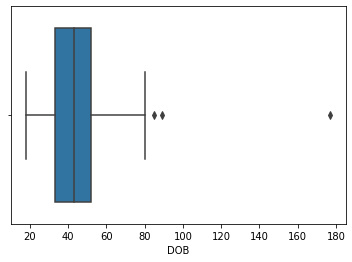

In [57]:
sns.boxplot(age)
#we see one outlier here

In [41]:
age.max(), age.min() #max age is 177 which is not possible in this age

(177.0, 18.0)

In [42]:
CustomerDemographic['job_title'].value_counts()

Business Systems Development Analyst    45
Social Worker                           44
Tax Accountant                          44
Internal Auditor                        42
Recruiting Manager                      41
Legal Assistant                         41
General Manager                         40
Associate Professor                     39
Structural Engineer                     39
Sales Representative                    38
Junior Executive                        38
Desktop Support Technician              38
Technical Writer                        37
Chemical Engineer                       37
Dental Hygienist                        37
Executive Secretary                     37
Senior Financial Analyst                37
Product Engineer                        36
Cost Accountant                         36
Assistant Professor                     36
Senior Developer                        36
Registered Nurse                        36
Food Chemist                            35
Administrat

In [43]:
CustomerDemographic['job_industry_category'].value_counts()

Manufacturing         799
Financial Services    774
Health                602
Retail                358
Property              267
IT                    223
Entertainment         136
Argiculture           113
Telecommunications     72
Name: job_industry_category, dtype: int64

In [53]:
def value_counter(x,col):
    return x[col].value_counts()

In [54]:
value_counter(CustomerDemographic,'wealth_segment')

Mass Customer        2000
High Net Worth       1021
Affluent Customer     979
Name: wealth_segment, dtype: int64

In [58]:
value_counter(CustomerDemographic, 'deceased_indicator')

N    3998
Y       2
Name: deceased_indicator, dtype: int64

In [ ]:
default                                302
owns_car                                 0
tenure

In [60]:
#value_counter(CustomerDemographic,'default')

In [61]:
value_counter(CustomerDemographic,'owns_car')

Yes    2024
No     1976
Name: owns_car, dtype: int64

In [64]:
#value_counter(CustomerDemographic,'tenure')

## Data Quality Assessment for Transactions